In [18]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
#Simple loop to have user select which version to run
while True:
    select = input("Please enter 'relu' or 'sigmoid' or 'combo' for RELU or Sigmoid or Combo of both respectively \n")
    if select in ["relu", "sigmoid", "combo"]:
        print("Running %s" % select)
        break

Running combo


In [3]:
def feed_forward(features, w1, b1, w2, b2, w3, b3, select):
    #my Sigmoid functions
    def sigmoid(x):
        return 1/(1+np.exp(-x))

    #my RELU function
    def relu(x):
        return np.maximum(x, 0)

    #run Relu, Sigmoid, or Combo depending on the user input
    #activation function gets ran on every layer
    if select == "sigmoid":
        #sigmoid
        #hidden layer 1
        hl1 = (np.matmul(w1, features))
        hl1_bias = np.add(hl1, b1)
        hl1_act = sigmoid(hl1_bias)
        #hidden layer 2
        hl2 = (np.matmul(w2, hl1_act))
        hl2_bias = np.add(hl2, b2)
        hl2_act = sigmoid(hl2_bias)
        #output layer
        output = (np.matmul(w3, hl2_act))
        targets_predicted = np.add(output, b3)
        targets_predicted = sigmoid(targets_predicted)
    elif select == "relu":
        #relu
        #hidden layer 1
        hl1 = (np.matmul(w1, features))
        hl1_bias = np.add(hl1, b1)
        hl1_act = relu(hl1_bias)
        #hidden layer 2
        hl2 = (np.matmul(w2, hl1_act))
        hl2_bias = np.add(hl2, b2)
        hl2_act = relu(hl2_bias)
        #output layer
        output = (np.matmul(w3, hl2_act))
        targets_predicted = np.add(output, b3)
        targets_predicted = relu(targets_predicted)
    else: #combo function
        #relu
        #hidden layer 1
        hl1 = (np.matmul(w1, features))
        hl1_bias = np.add(hl1, b1)
        hl1_act = relu(hl1_bias)
        #relu
        #hidden layer 2
        hl2 = (np.matmul(w2, hl1_act))
        hl2_bias = np.add(hl2, b2)
        hl2_act = relu(hl2_bias)
        #sigmoid
        #output layer
        output = (np.matmul(w3, hl2_act))
        targets_predicted = np.add(output, b3)
        targets_predicted = sigmoid(targets_predicted)
    return targets_predicted

In [4]:
def loss(features, w1, b1, w2, b2, w3, b3, targets_observed, select):
    '''
    w1 is weights matrix for transition from input to first hidden layer
    b1 is the biases added at the first hidden layer
    w2 is weights matrix for transition from hidden layer 1 to hidden layer 2
    b2 is the biases added to the second hidden layer
    w3 is weights matrix for transition from hidden layer 2 to output layer
    b3 is the biases added to the output layer
    Usage: Calculate the sum of square residuals of the feed forward function
    '''
    #Loss function to 
    Targets_Predicted = feed_forward(features, w1, b1, w2, b2, w3, b3, select)
    return np.sum((Targets_Predicted - targets_observed) ** 2)

In [5]:
print('You selected: ' + select)
print('Engines Starting ...')
print('Hold Tight Running Epochs')

#set up training datam
#each row is a case
#columns 0-4 are features
#columns 5 & 6 are targets
features_and_targets = np.array(
                                   [[0, 0, 0, 0, 0, 0, 1],
                                    [0, 0, 0, 0, 1, 0, 1],
                                    [0, 0, 0, 1, 1, 0, 1],
                                    [0, 0, 1, 1, 1, 0, 1],
                                    [0, 1, 1, 1, 1, 0, 1],
                                    [1, 1, 1, 1, 0, 0, 1],
                                    [1, 1, 1, 0, 0, 0, 1],
                                    [1, 1, 0, 0, 0, 0, 1],
                                    [1, 0, 0, 0, 0, 0, 1],
                                    [1, 0, 0, 1, 0, 0, 1],
                                    [1, 0, 1, 1, 0, 0, 1],
                                    [1, 1, 0, 1, 0, 0, 1],
                                    [0, 1, 0, 1, 1, 0, 1],
                                    [0, 0, 1, 0, 1, 0, 1],
                                    [1, 0, 1, 1, 1, 1, 0],
                                    [1, 1, 0, 1, 1, 1, 0],
                                    [1, 0, 1, 0, 1, 1, 0],
                                    [1, 0, 0, 0, 1, 1, 0],
                                    [1, 1, 0, 0, 1, 1, 0],
                                    [1, 1, 1, 0, 1, 1, 0],
                                    [1, 1, 1, 1, 1, 1, 0],
                                    [1, 0, 0, 1, 1, 1, 0]], dtype=float)

#shuffle our cases
np.random.shuffle(features_and_targets)

#transpose Matrix for mat mul in feed forward
features = np.transpose(features_and_targets[:, 0:5])
targets_observed = np.transpose(features_and_targets[:, 5:7])
number_of_features, number_of_cases = features.shape
print('Number of Features:', number_of_features)
print('Number of Cases:', number_of_cases)

You selected: combo
Engines Starting ...
Hold Tight Running Epochs
Number of Features: 5
Number of Cases: 22


In [6]:
#set initial weights and biases
#use a seed so others can replicate results
np.random.seed(912312)

losses = []
weights_1 = np.random.rand(4, 5)
biases_1 = np.random.rand(4, number_of_cases)
weights_2 = np.random.rand(3, 4)
biases_2 = np.random.rand(3, number_of_cases)
weights_3 = np.random.rand(2, 3)
biases_3 = np.random.rand(2, number_of_cases)

#set our learning rate
lr = 0.00001


In [7]:
#find slope
#grad loss, variable you want to look at

d_loss_by_d_w1 = grad(loss, 1)  # w1
d_loss_by_d_b1 = grad(loss, 2)  # b1
d_loss_by_d_w2 = grad(loss, 3)  # w2
d_loss_by_d_b2 = grad(loss, 4)  # b2
d_loss_by_d_w3 = grad(loss, 5)  # w3
d_loss_by_d_b3 = grad(loss, 6)  # b3

In [8]:
#create epoch for our back tracking.
#backpropagate to calculate the gradient for each weight
epochs = 10000

for epoch in range(epochs):
    weights_1 -= lr * d_loss_by_d_w1(features, weights_1, biases_1, weights_2,
                                     biases_2, weights_3, biases_3,
                                     targets_observed, select)
    biases_1 -= lr * d_loss_by_d_b1(features, weights_1, biases_1, weights_2,
                                    biases_2, weights_3, biases_3,
                                    targets_observed, select)
    weights_2 -= lr * d_loss_by_d_w2(features, weights_1, biases_1, weights_2,
                                     biases_2, weights_3, biases_3,
                                     targets_observed, select)
    biases_2 -= lr * d_loss_by_d_b2(features, weights_1, biases_1, weights_2,
                                    biases_2, weights_3, biases_3,
                                    targets_observed, select)
    weights_3 -= lr * d_loss_by_d_w3(features, weights_1, biases_1, weights_2,
                                     biases_2, weights_3, biases_3,
                                     targets_observed, select)
    biases_3 -= lr * d_loss_by_d_b3(features, weights_1, biases_1, weights_2,
                                    biases_2, weights_3, biases_3,
                                    targets_observed, select)
    losses.append(loss(features, weights_1, biases_1, weights_2,
                       biases_2, weights_3, biases_3,
                       targets_observed, select))

    #used for testing purposes. If you want to see how the
    #loss backpropagate is calculating a lower gradient uncomment this
    print(epoch, loss(features, weights_1, biases_1, weights_2, biases_2,
                      weights_3, biases_3, targets_observed, select))

751944
9153 21.648946782851983
9154 21.648929152335604
9155 21.6489115202026
9156 21.648893886452743
9157 21.648876251085824
9158 21.648858614101616
9159 21.64884097549991
9160 21.648823335280483
9161 21.648805693443116
9162 21.648788049987587
9163 21.648770404913684
9164 21.648752758221185
9165 21.648735109909868
9166 21.648717459979526
9167 21.648699808429924
9168 21.64868215526086
9169 21.648664500472112
9170 21.64864684406345
9171 21.648629186034654
9172 21.648611526385523
9173 21.648593865115828
9174 21.648576202225346
9175 21.648558537713868
9176 21.648540871581154
9177 21.648523203827015
9178 21.64850553445121
9179 21.64848786345353
9180 21.648470190833752
9181 21.64845251659165
9182 21.648434840727017
9183 21.648417163239632
9184 21.648399484129264
9185 21.64838180339571
9186 21.648364121038743
9187 21.648346437058134
9188 21.64832875145368
9189 21.648311064225148
9190 21.648293375372326
9191 21.648275684894998
9192 21.648257992792924
9193 21.648240299065915
9194 21.64822260371

In [9]:
#run feed forward
Targets_Predicted = feed_forward(features, weights_1, biases_1, weights_2,
                                 biases_2, weights_3, biases_3, select)


Features : 
 [[0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0.]
 [0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1.]]
 Targets : 
 [[0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.]
 [1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1.]]
 Targets predicted : 
 [[0.99928483 0.99924472 0.97972359 0.99147688 0.99955636 0.99737312
  0.99983988 0.99843578 0.92351123 0.99935215 0.99996633 0.99158668
  0.99989063 0.99973965 0.99972306 0.99997295 0.99549351 0.99139091
  0.99992793 0.99998123 0.99932553 0.96957071]
 [0.99749076 0.99684409 0.94953848 0.97068513 0.99670667 0.97948754
  0.99834091 0.993927   0.92418635 0.99661445 0.99976105 0.98056911
  0.99840393 0.99809948 0.99723913 0.999673   0.99373656 0.97259801
  0.9984133

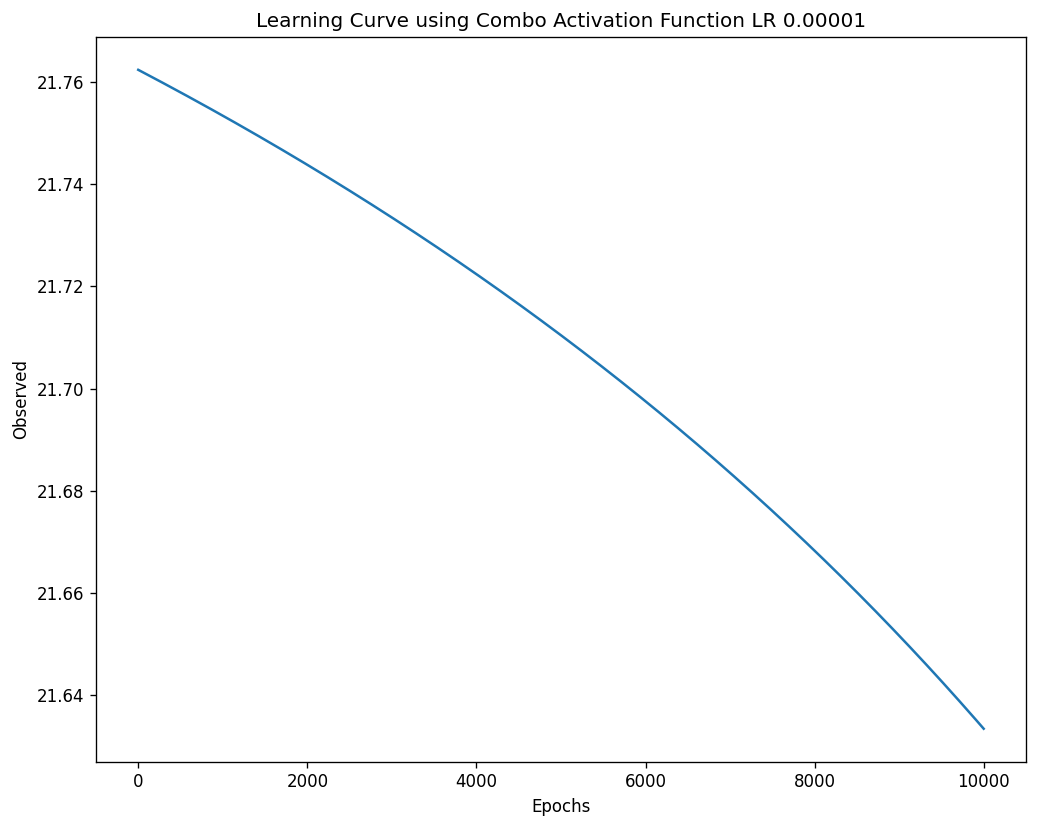

In [22]:
'''
Code to show line graph of the Epochs vs Observed
'''
print('Features : \n', features)
print(' Targets : \n', targets_observed)
print(' Targets predicted : \n', Targets_Predicted)
figure(figsize=(10,8), dpi=120)
plt.plot(losses) #plot losses
plt.xlabel('Epochs')  #add x label name
plt.title('Learning Curve using Combo Activation Function LR 0.00001') #set title
plt.ylabel('Observed') #add y label name

plt.savefig('%s_line.png' % select) #save figure
plt.show() #show plot and clear object

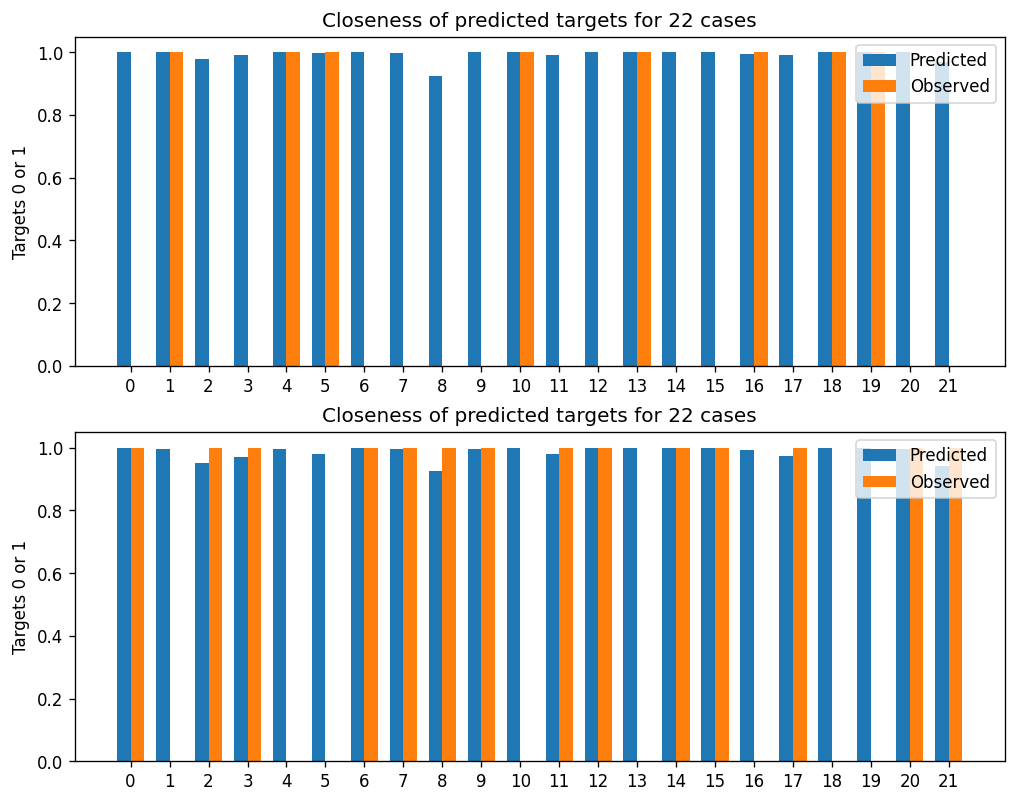

In [23]:
'''
Code to show observed vs predicted
'''
N = 22
target1_predicted = Targets_Predicted[0, ]
target2_predicted = Targets_Predicted[1, :]
target1_observed = targets_observed[0, :]
target2_observed = targets_observed[1, :]

ind = np.arange(N)
width = 0.35

figure(figsize=(10,8), dpi=120) #set fig size and dpi
plt.subplot(2, 1, 1) #create subplot
plt.bar(ind, target1_predicted, width, label='Predicted') #create predicted bar
plt.bar(ind + width, target1_observed, width, label='Observed') #create observed bar
plt.ylabel('Targets 0 or 1') #set y label
plt.title('Closeness of predicted targets for 22 cases') #set title
plt.xticks(ind + width / 2, ind) 
plt.legend(loc='best') #set legend place to best/show legend
plt.subplot(2, 1, 2) #set subplot 2 generation
plt.bar(ind, target2_predicted, width, label='Predicted') #create predicted bar
plt.bar(ind + width, target2_observed, width, label='Observed') #create observed bar
plt.ylabel('Targets 0 or 1') #set y label
plt.title('Closeness of predicted targets for 22 cases') #set title
plt.xticks(ind + width / 2, ind)
plt.legend(loc='best') #set legend place to best/show legend
plt.savefig('%s_observation.png' % select) #save figure
plt.show() #show plot 
